---
title: "Lab 1"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  echo: true
  warning: false
  message: false
---

# **Task 1**
**1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

**2. Import the q1data.csv dataset.**

**3. Recreate the plot as best you can using plotnine.**

**4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**



1-The aestehtics that seem to being used here are x, y, color, size, and identity(which would be the mark itself). Based on the graph I believe the aesthetics would be as fallows

X axis is the Income variable

Y axis is Life Expectancy

Color is World Region (which there is 4 total)

Size is the country population

Then the identity/each mark is the country

In [70]:
# 2 - Importing the dataset
from google.colab import files
import pandas as pd

# I was having trouble uploading to my ipynb file in COLAB so I searched up and found this function that worked well! Hopefully that is okay to use!
uploaded = files.upload()
df = pd.read_csv("q1data.csv")
df.head()

Saving q1data.csv to q1data (2).csv


,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


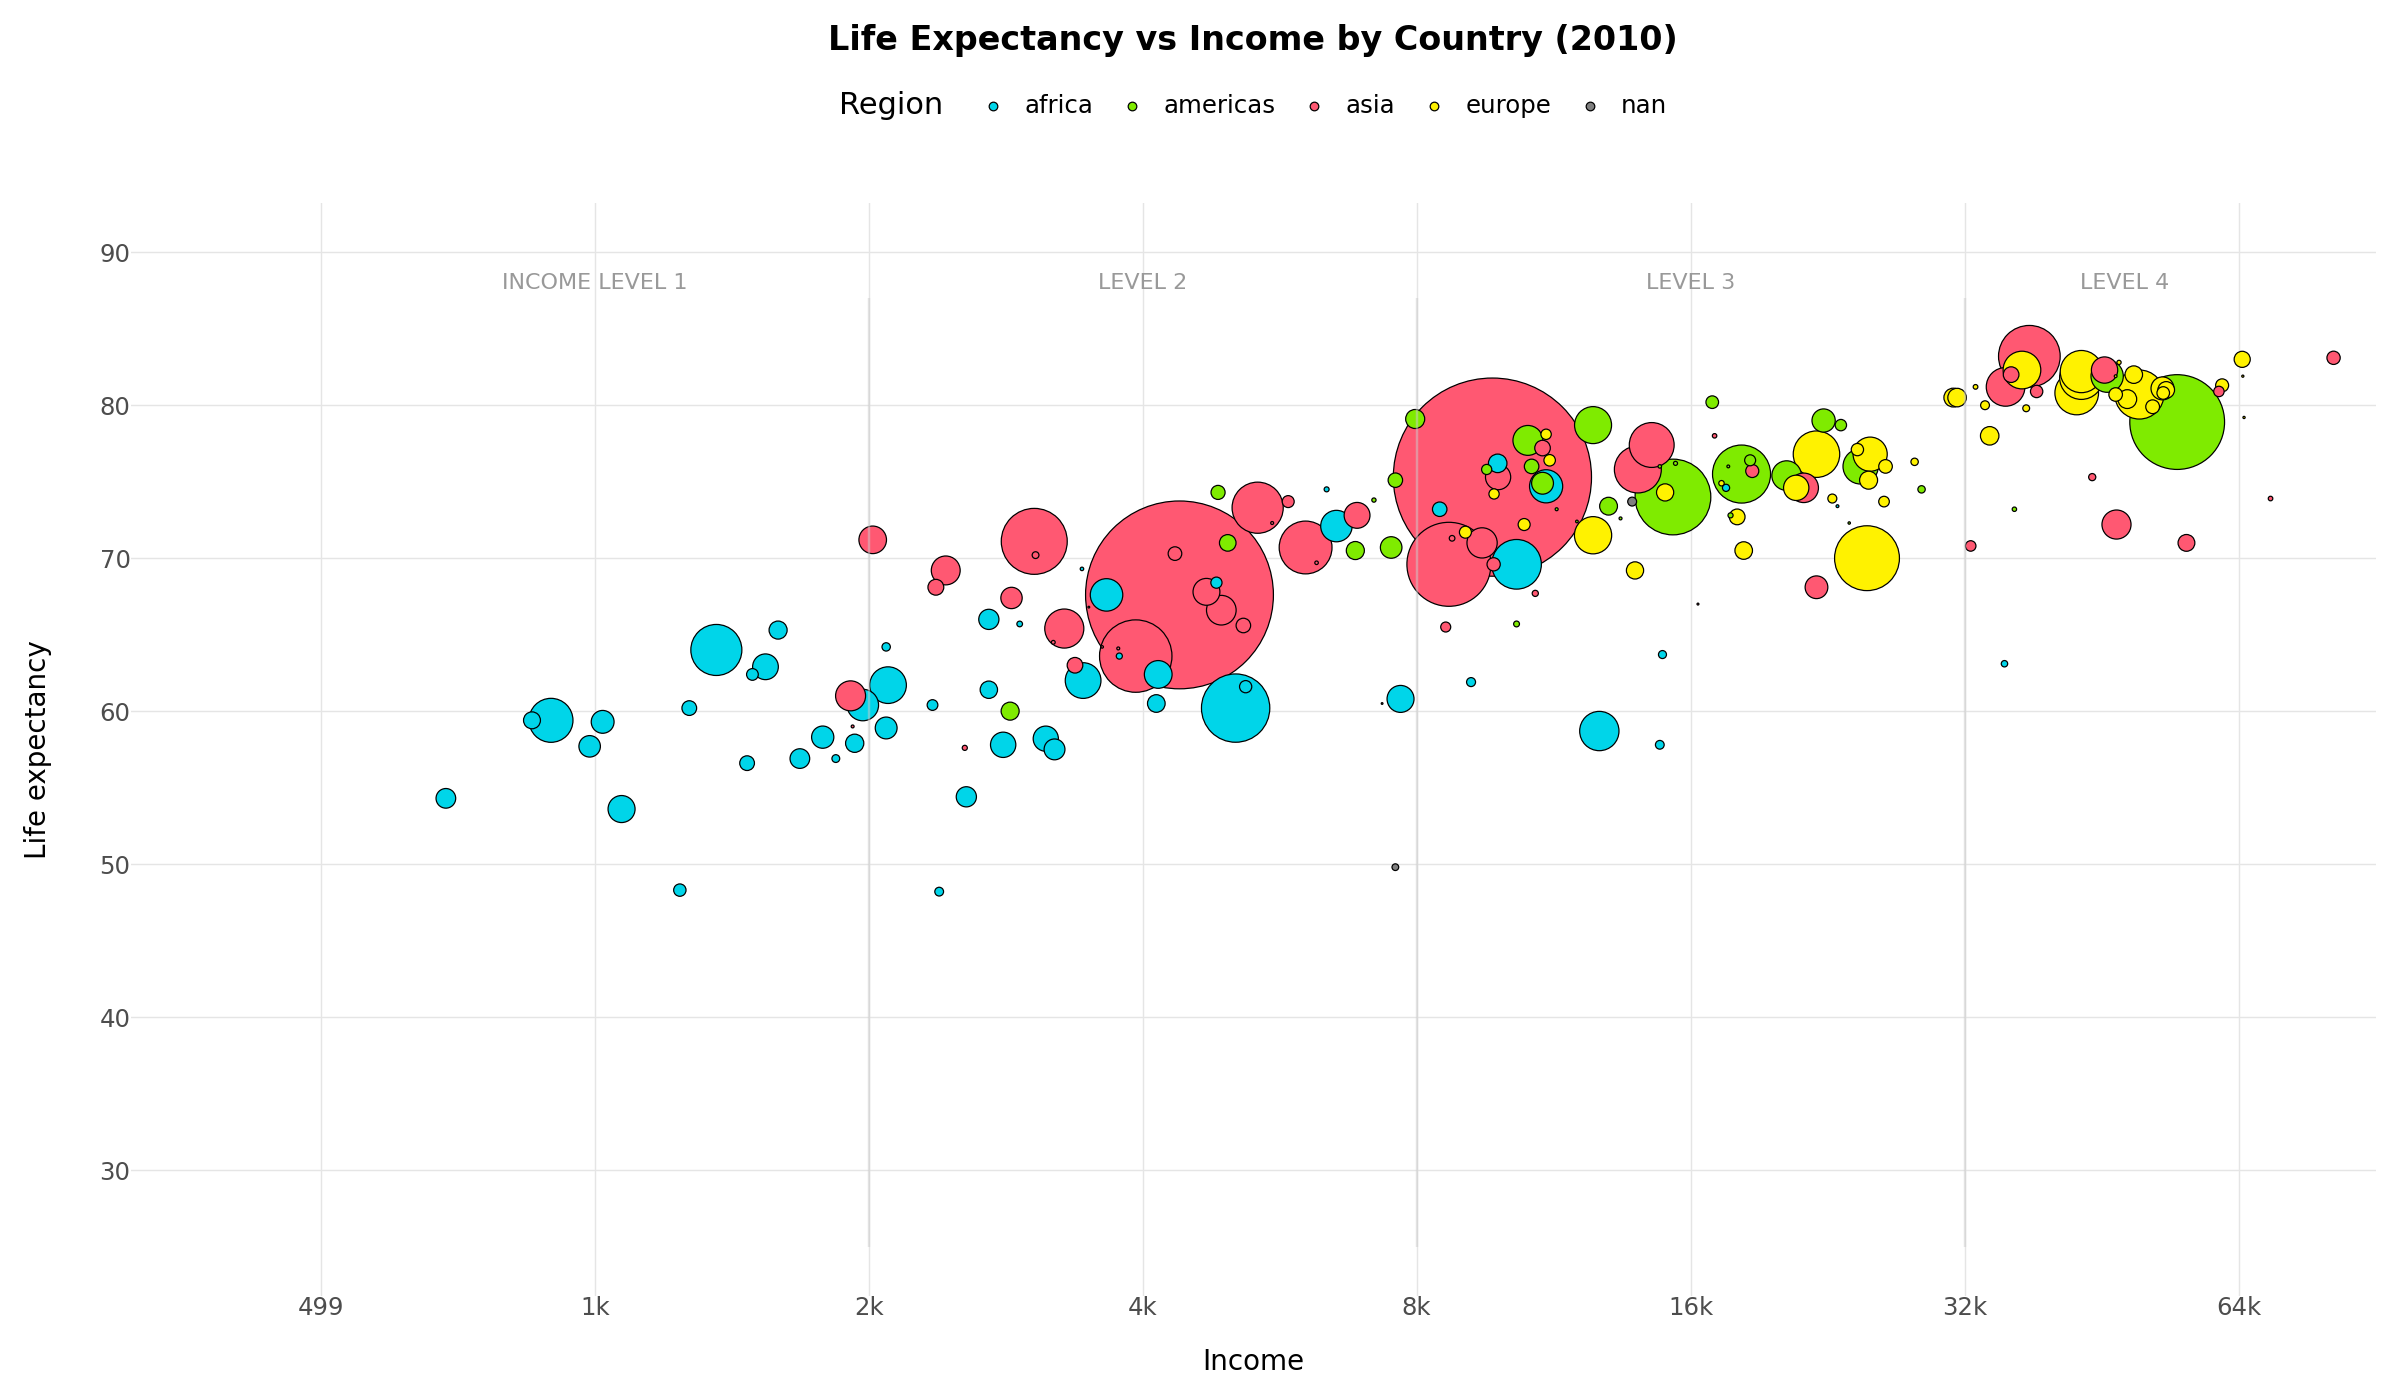

In [81]:
# Decided I would upload all the one's I thought I might use throughout
from plotnine import (
    ggplot, aes, geom_point, scale_x_log10, scale_size_area, labs,
    theme_minimal, theme, scale_color_manual, coord_cartesian,
    scale_y_continuous, element_text, element_line, element_rect, element_blank,
    annotate, guides, scale_fill_manual
)

# First making it so the biggest circles are in the far back
df_sorted = df.sort_values('population', ascending=False)


# As for colors I just asked chat gpt for codes similar to the colors I uploaded to them
region_colors = {
    "asia": "#FF5872",
    "europe": "#FFF200",
    "africa": "#00D5E9",
    "americas": "#7FEB00"
}

# x-axis breaks
x_breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]

(
    ggplot(df_sorted)
    + aes(x="income", y="life_exp", size="population", fill="four_regions") #the basic aesthetics
    + geom_point(alpha=1, color="black", stroke=0.25, shape="o") # making it so each circle is outlined in black, and the fill has full transparency
    + scale_x_log10(  # The data seemed to be logged across the x acxis
        breaks=x_breaks,  #For this section (including the line below) I had to search up some code and fucntion ideas because I wasn't quite sure how to implument
        labels=lambda l: [f"{int(x/1000)}k" if x >= 1000 else str(int(x)) for x in l] #refer to line above)
    )
    + scale_y_continuous(breaks=range(20, 91, 10))
    + scale_size_area(max_size=40)
    + scale_fill_manual(values=region_colors)
    + coord_cartesian(xlim=(400, 70000), ylim=(25, 90))

    # Did all of these to make the income level annotations at the top
    + annotate("text", x=1000, y=88, label="INCOME LEVEL 1", size=8, color="#999999", ha="center")
    + annotate("text", x=4000, y=88, label="LEVEL 2", size=8, color="#999999", ha="center")
    + annotate("text", x=16000, y=88, label="LEVEL 3", size=8, color="#999999", ha="center")
    + annotate("text", x=48000, y=88, label="LEVEL 4", size=8, color="#999999", ha="center")

    # Vertical dividing lines between income levels
    + annotate("segment", x=2000, xend=2000, y=25, yend=87, color="#CCCCCC", size=0.5, alpha=0.5)
    + annotate("segment", x=8000, xend=8000, y=25, yend=87, color="#CCCCCC", size=0.5, alpha=0.5)
    + annotate("segment", x=32000, xend=32000, y=25, yend=87, color="#CCCCCC", size=0.5, alpha=0.5)

    + labs(
        x="Income",
        y="Life expectancy",
        title="Life Expectancy vs Income by Country (2010)",
        fill="Region"
    )
    + theme_minimal()
    + theme(
        figure_size=(12, 7),
        legend_position="top",
        legend_box="horizontal",
        panel_grid_major=element_line(color="#E5E5E5", size=0.5),
        panel_grid_minor=element_blank(),
        axis_title_x=element_text(size=10, margin={'t': 10}),
        axis_title_y=element_text(size=10, margin={'r': 10}),
        plot_title=element_text(size=12, weight='bold')
    )
    + guides(size=False)
)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide


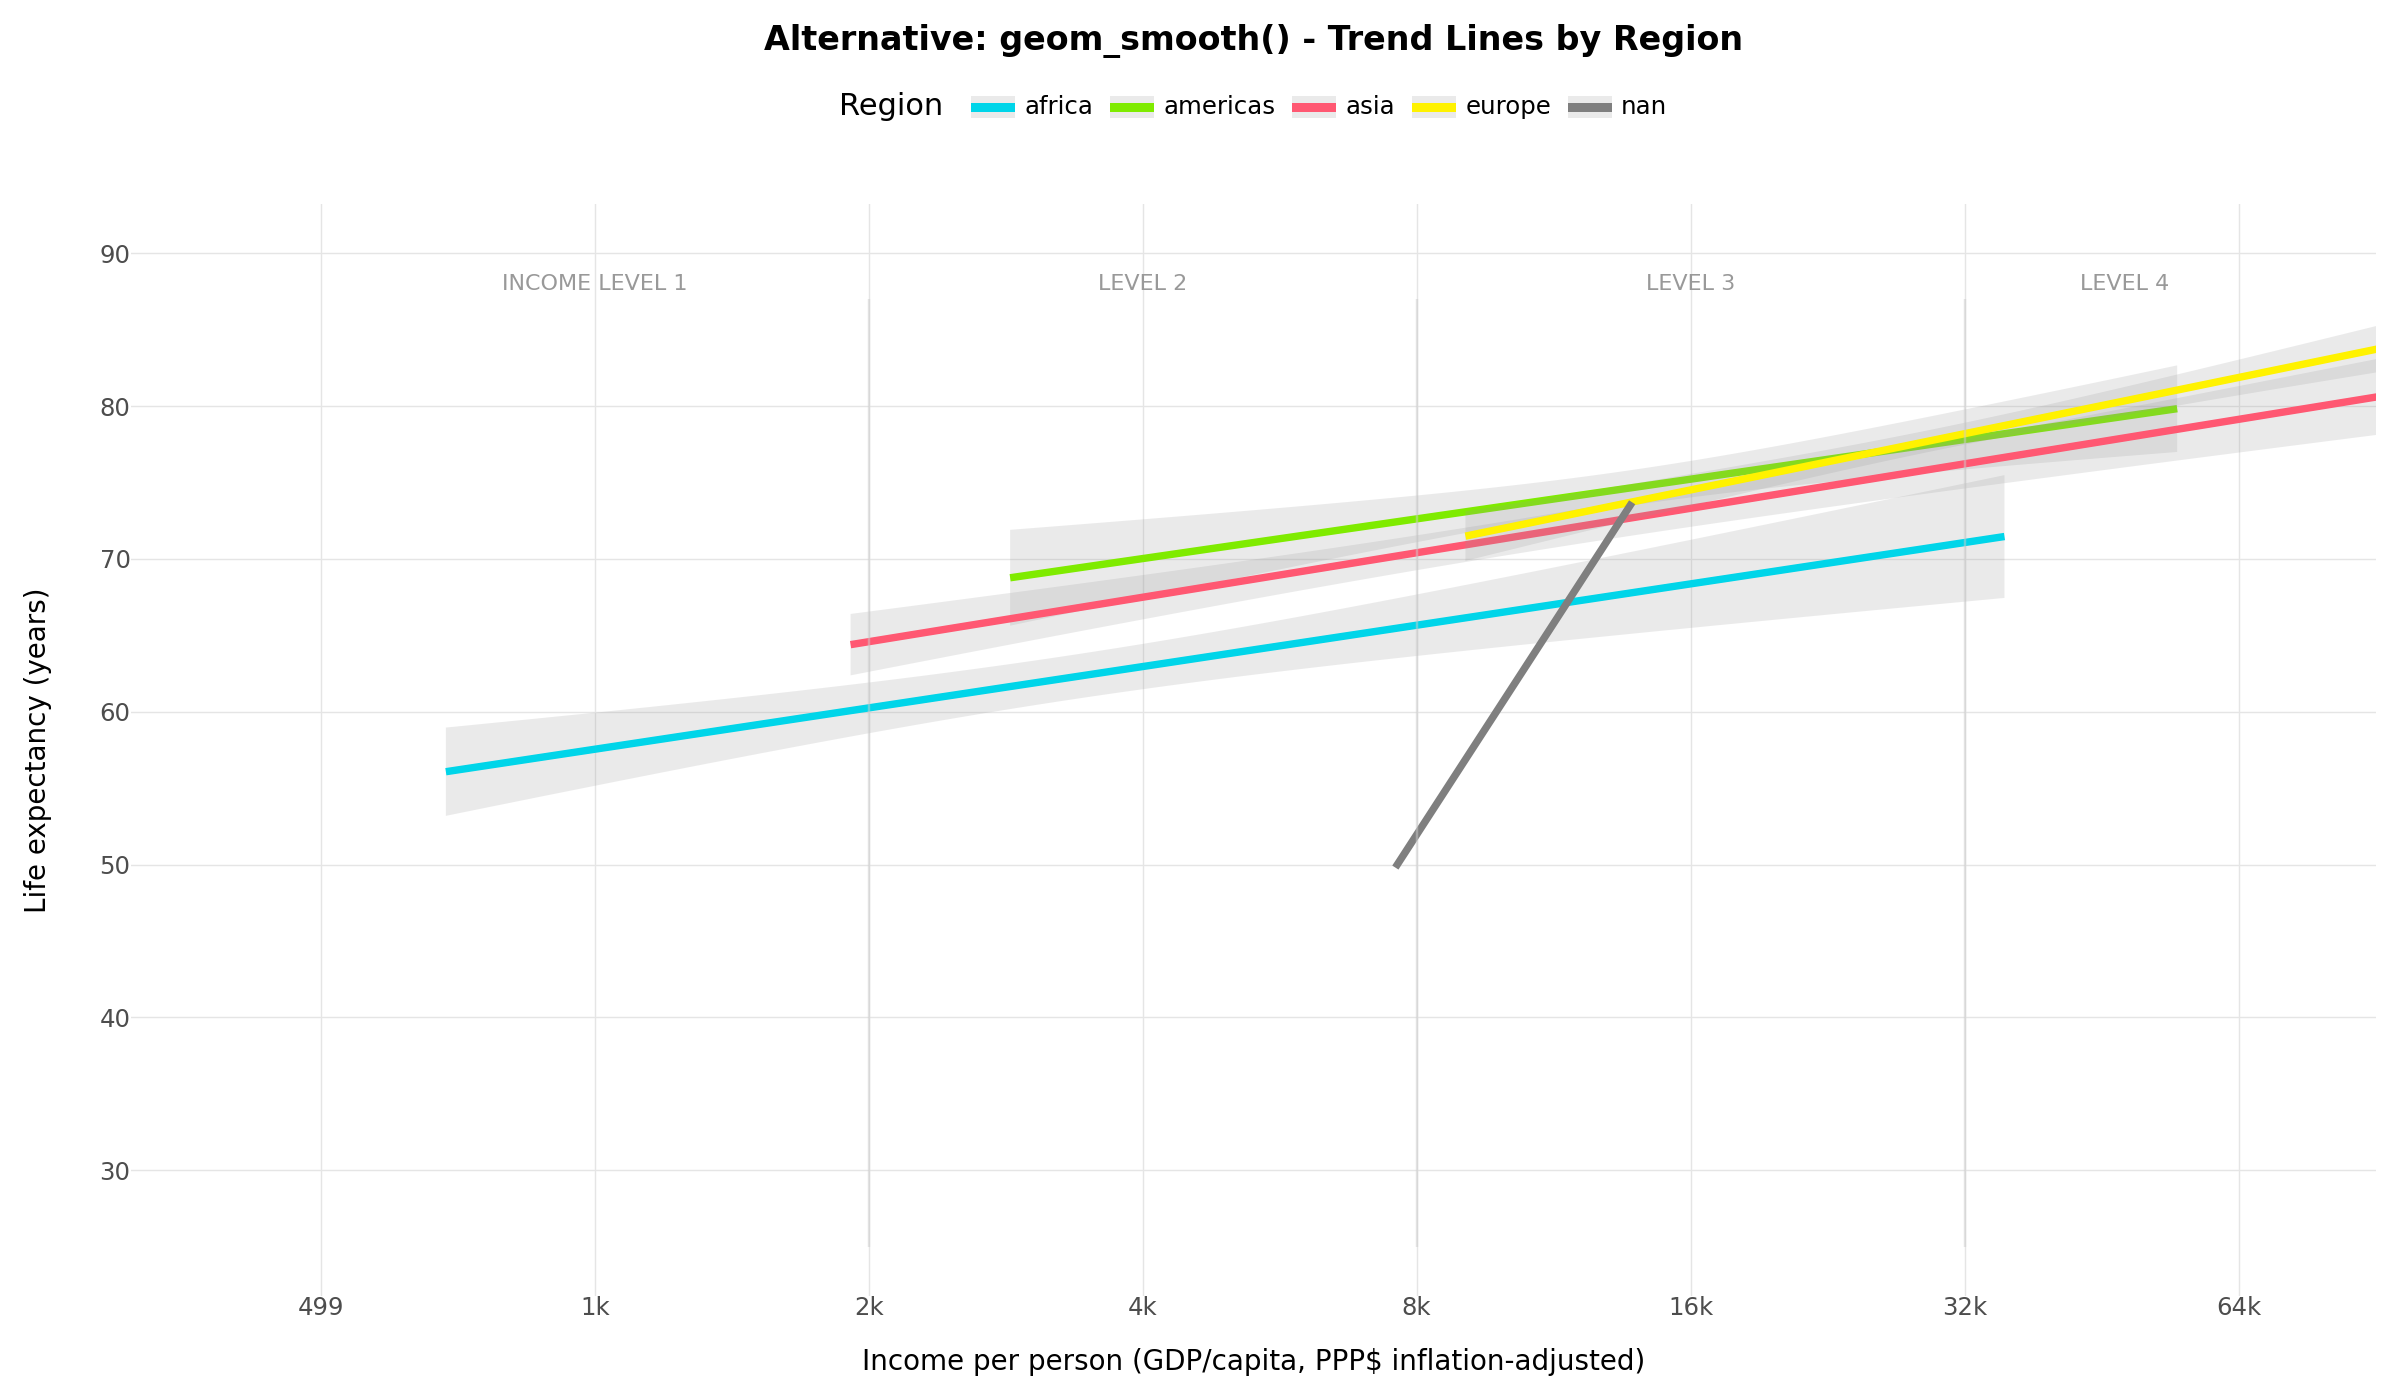

In [82]:
from plotnine import (
    ggplot, aes, geom_point, geom_smooth, scale_x_log10, scale_size_area, labs,
    theme_minimal, theme, scale_color_manual, coord_cartesian,
    scale_y_continuous, element_text, element_line, element_rect, element_blank,
    annotate, guides
)

# same thing as above
region_colors = {
    "asia": "#FF5872",
    "europe": "#FFF200",
    "africa": "#00D5E9",
    "americas": "#7FEB00"
}

# x-axis breaks
x_breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]

(
    ggplot(df)
    + aes(x="income", y="life_exp", color="four_regions")
    + geom_smooth(method="lm", se=True, size=1.5, alpha=0.2)  # Linear trend lines by region
    + scale_x_log10(
        breaks=x_breaks,
        labels=lambda l: [f"{int(x/1000)}k" if x >= 1000 else str(int(x)) for x in l]
    )
    + scale_y_continuous(breaks=range(30, 91, 10))
    + scale_color_manual(values=region_colors)
    + coord_cartesian(xlim=(400, 70000), ylim=(25, 90))

    # Income level annotations at the top
    + annotate("text", x=1000, y=88, label="INCOME LEVEL 1", size=8, color="#999999", ha="center")
    + annotate("text", x=4000, y=88, label="LEVEL 2", size=8, color="#999999", ha="center")
    + annotate("text", x=16000, y=88, label="LEVEL 3", size=8, color="#999999", ha="center")
    + annotate("text", x=48000, y=88, label="LEVEL 4", size=8, color="#999999", ha="center")

    # Vertical dividing lines between income levels
    + annotate("segment", x=2000, xend=2000, y=25, yend=87, color="#CCCCCC", size=0.5, alpha=0.5)
    + annotate("segment", x=8000, xend=8000, y=25, yend=87, color="#CCCCCC", size=0.5, alpha=0.5)
    + annotate("segment", x=32000, xend=32000, y=25, yend=87, color="#CCCCCC", size=0.5, alpha=0.5)

    + labs(
        x="Income per person (GDP/capita, PPP$ inflation-adjusted)",
        y="Life expectancy (years)",
        title="Alternative: geom_smooth() - Trend Lines by Region",
        color="Region"
    )
    + theme_minimal()
    + theme(
        figure_size=(12, 7),
        legend_position="top",
        legend_box="horizontal",
        panel_grid_major=element_line(color="#E5E5E5", size=0.5),
        panel_grid_minor=element_blank(),
        axis_title_x=element_text(size=10, margin={'t': 10}),
        axis_title_y=element_text(size=10, margin={'r': 10}),
        plot_title=element_text(size=12, weight='bold')
    )
)

This one has pro's and con's as it is actually easier to understand each regions general trend easier as each bar gives a clear range, along with that band showing the confidence interval of the fitted regression line. In this sense, you can collect region understanding very quickly and also see the clear relationship betwewen income and life expextancy.

The big con here is you don't see each individual country at all, nor do you get the same sense of population. Overall, I would defintely go with the bubble graph for deeper analysis

# **Task 2**
**1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

**2. Import the q2data.csv dataset.**

**3. Recreate the plot as best you can using plotnine.**

**4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

1) The aesthetics for this one seemed to be x-axis, y-axis, color, size, shape, very similar to the last just changing the values

The x axis is represented by Exports (the % of GDP)

The y axis is represented by GDP (the % of GDP)

Similar to last time, the

color is the region (4 total)

BUT NOW size is the energy use variable

And each individual bubble is the coutry

In [83]:
# 2
# 2 - Importing the dataset
from google.colab import files
import pandas as pd

# I was having trouble uploading to my ipynb file in COLAB so I searched up and found this function that worked well! Hopefully that is okay to use!
uploaded = files.upload()
df = pd.read_csv("q2data.csv")
df.head()

Saving q2data.csv to q2data (1).csv


,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


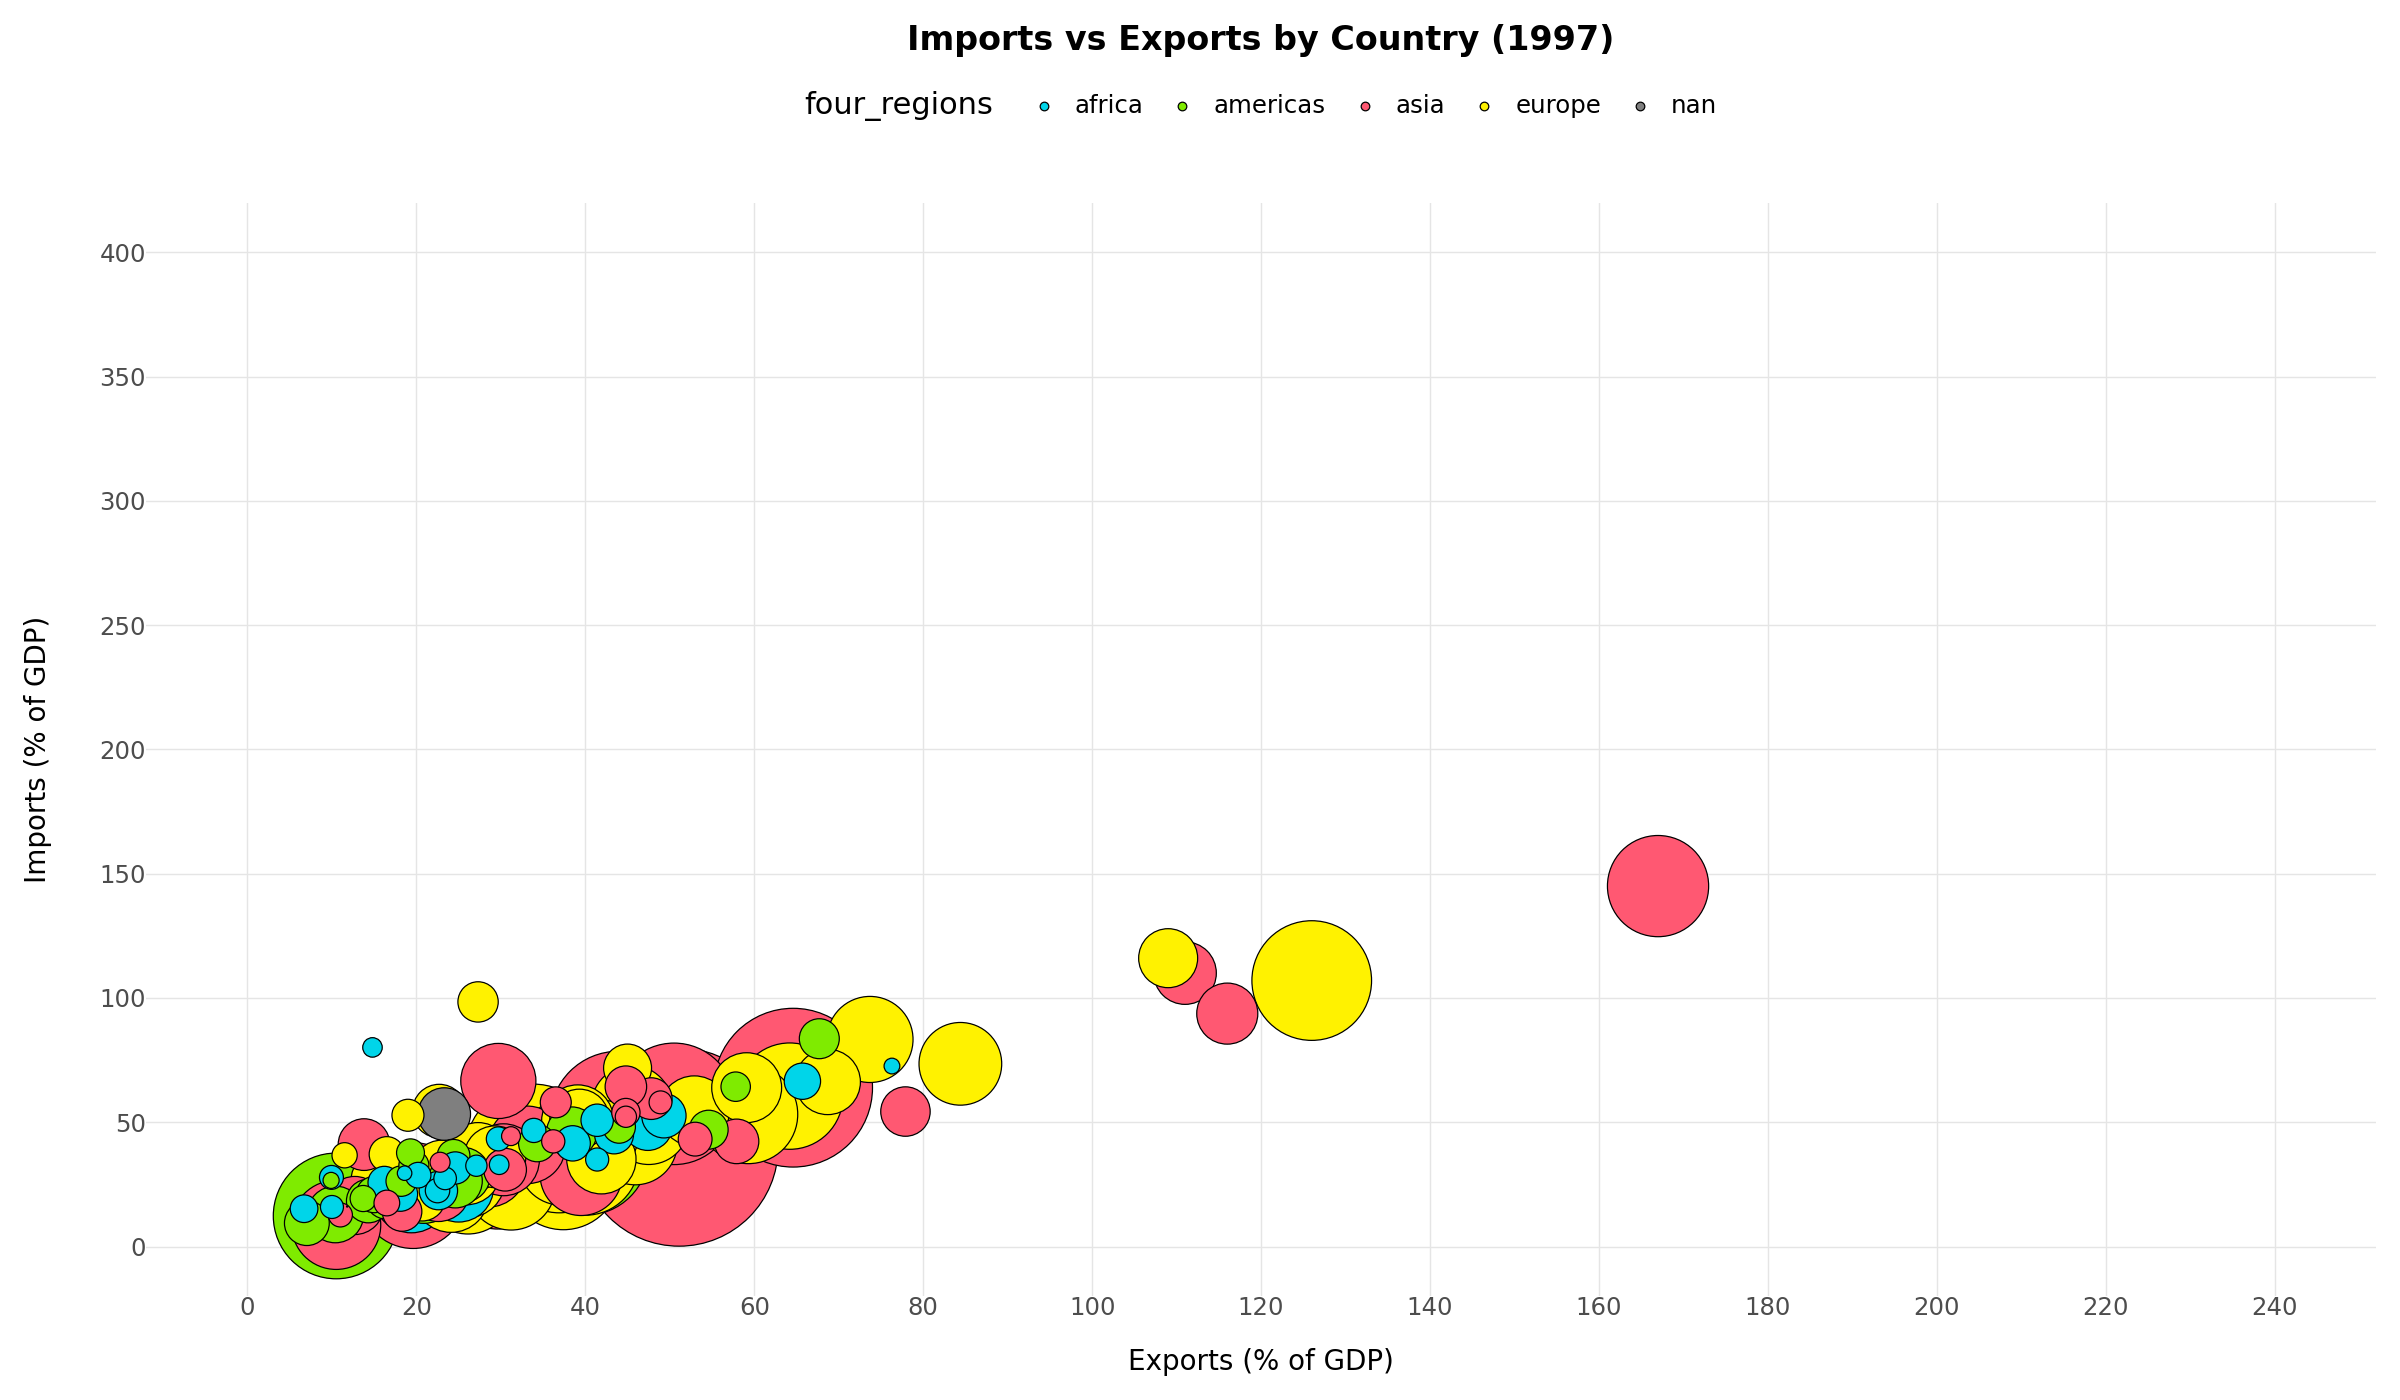

In [49]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, scale_x_continuous, scale_size_area, labs,
    theme_minimal, theme, scale_color_manual, coord_cartesian,
    scale_y_continuous, element_text, element_line, element_rect, element_blank,
    annotate, guides
)

# Function to convert values like '12.4k' to numbers
def convert_k_to_number(value):
    if pd.isna(value):
        return None
    if isinstance(value, str):
        if 'k' in value.lower():
            return float(value.lower().replace('k', '')) * 1000
        return float(value)
    return value

# Apply conversion to energy column
df['energy'] = df['energy'].apply(convert_k_to_number)

# Convert all numeric columns to proper numeric types
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')
df['exports'] = pd.to_numeric(df['exports'], errors='coerce')
df['imports'] = pd.to_numeric(df['imports'], errors='coerce')

# Remove rows with missing values in key columns
df_clean = df.dropna(subset=['exports', 'imports', 'energy'])

# Sort by energy (size) in descending order so largest bubbles are drawn first (in back)
df_clean = df_clean.sort_values('energy', ascending=False)

# Using colors from earlier
region_colors = {
    "asia": "#FF5872",
    "europe": "#FFF200",
    "africa": "#00D5E9",
    "americas": "#7FEB00"
}

(
    ggplot(df_clean)
    + aes(x="exports", y="imports", size="energy", color="four_regions")
    + geom_point(aes(x="exports", y="imports", size="energy", fill="four_regions"), alpha=1.0, color="black", stroke=0.5, shape="o")  # Circles with black outlines
    + scale_x_continuous(breaks=range(0, 241, 20)) # Establishing proper axis
    + scale_y_continuous(breaks=range(0, 401, 50))
    + scale_size_area(max_size=40) #makign max area size so easier to see tiny and big ones in same graph
    + scale_color_manual(values=region_colors)
    + scale_fill_manual(values=region_colors)
    + coord_cartesian(xlim=(0, 240), ylim=(0, 400))
    + labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)",
        title="Imports vs Exports by Country (1997)",
        color="Region",
        size="Energy Use"
    )
    + theme_minimal()
    + theme(
        figure_size=(12, 7),
        legend_position="top",
        legend_box="horizontal",
        panel_grid_major=element_line(color="#E5E5E5", size=0.5),
        panel_grid_minor=element_blank(),
        axis_title_x=element_text(size=10, margin={'t': 10}),
        axis_title_y=element_text(size=10, margin={'r': 10}),
        plot_title=element_text(size=12, weight='bold')
    )
    + guides(size=False)
)

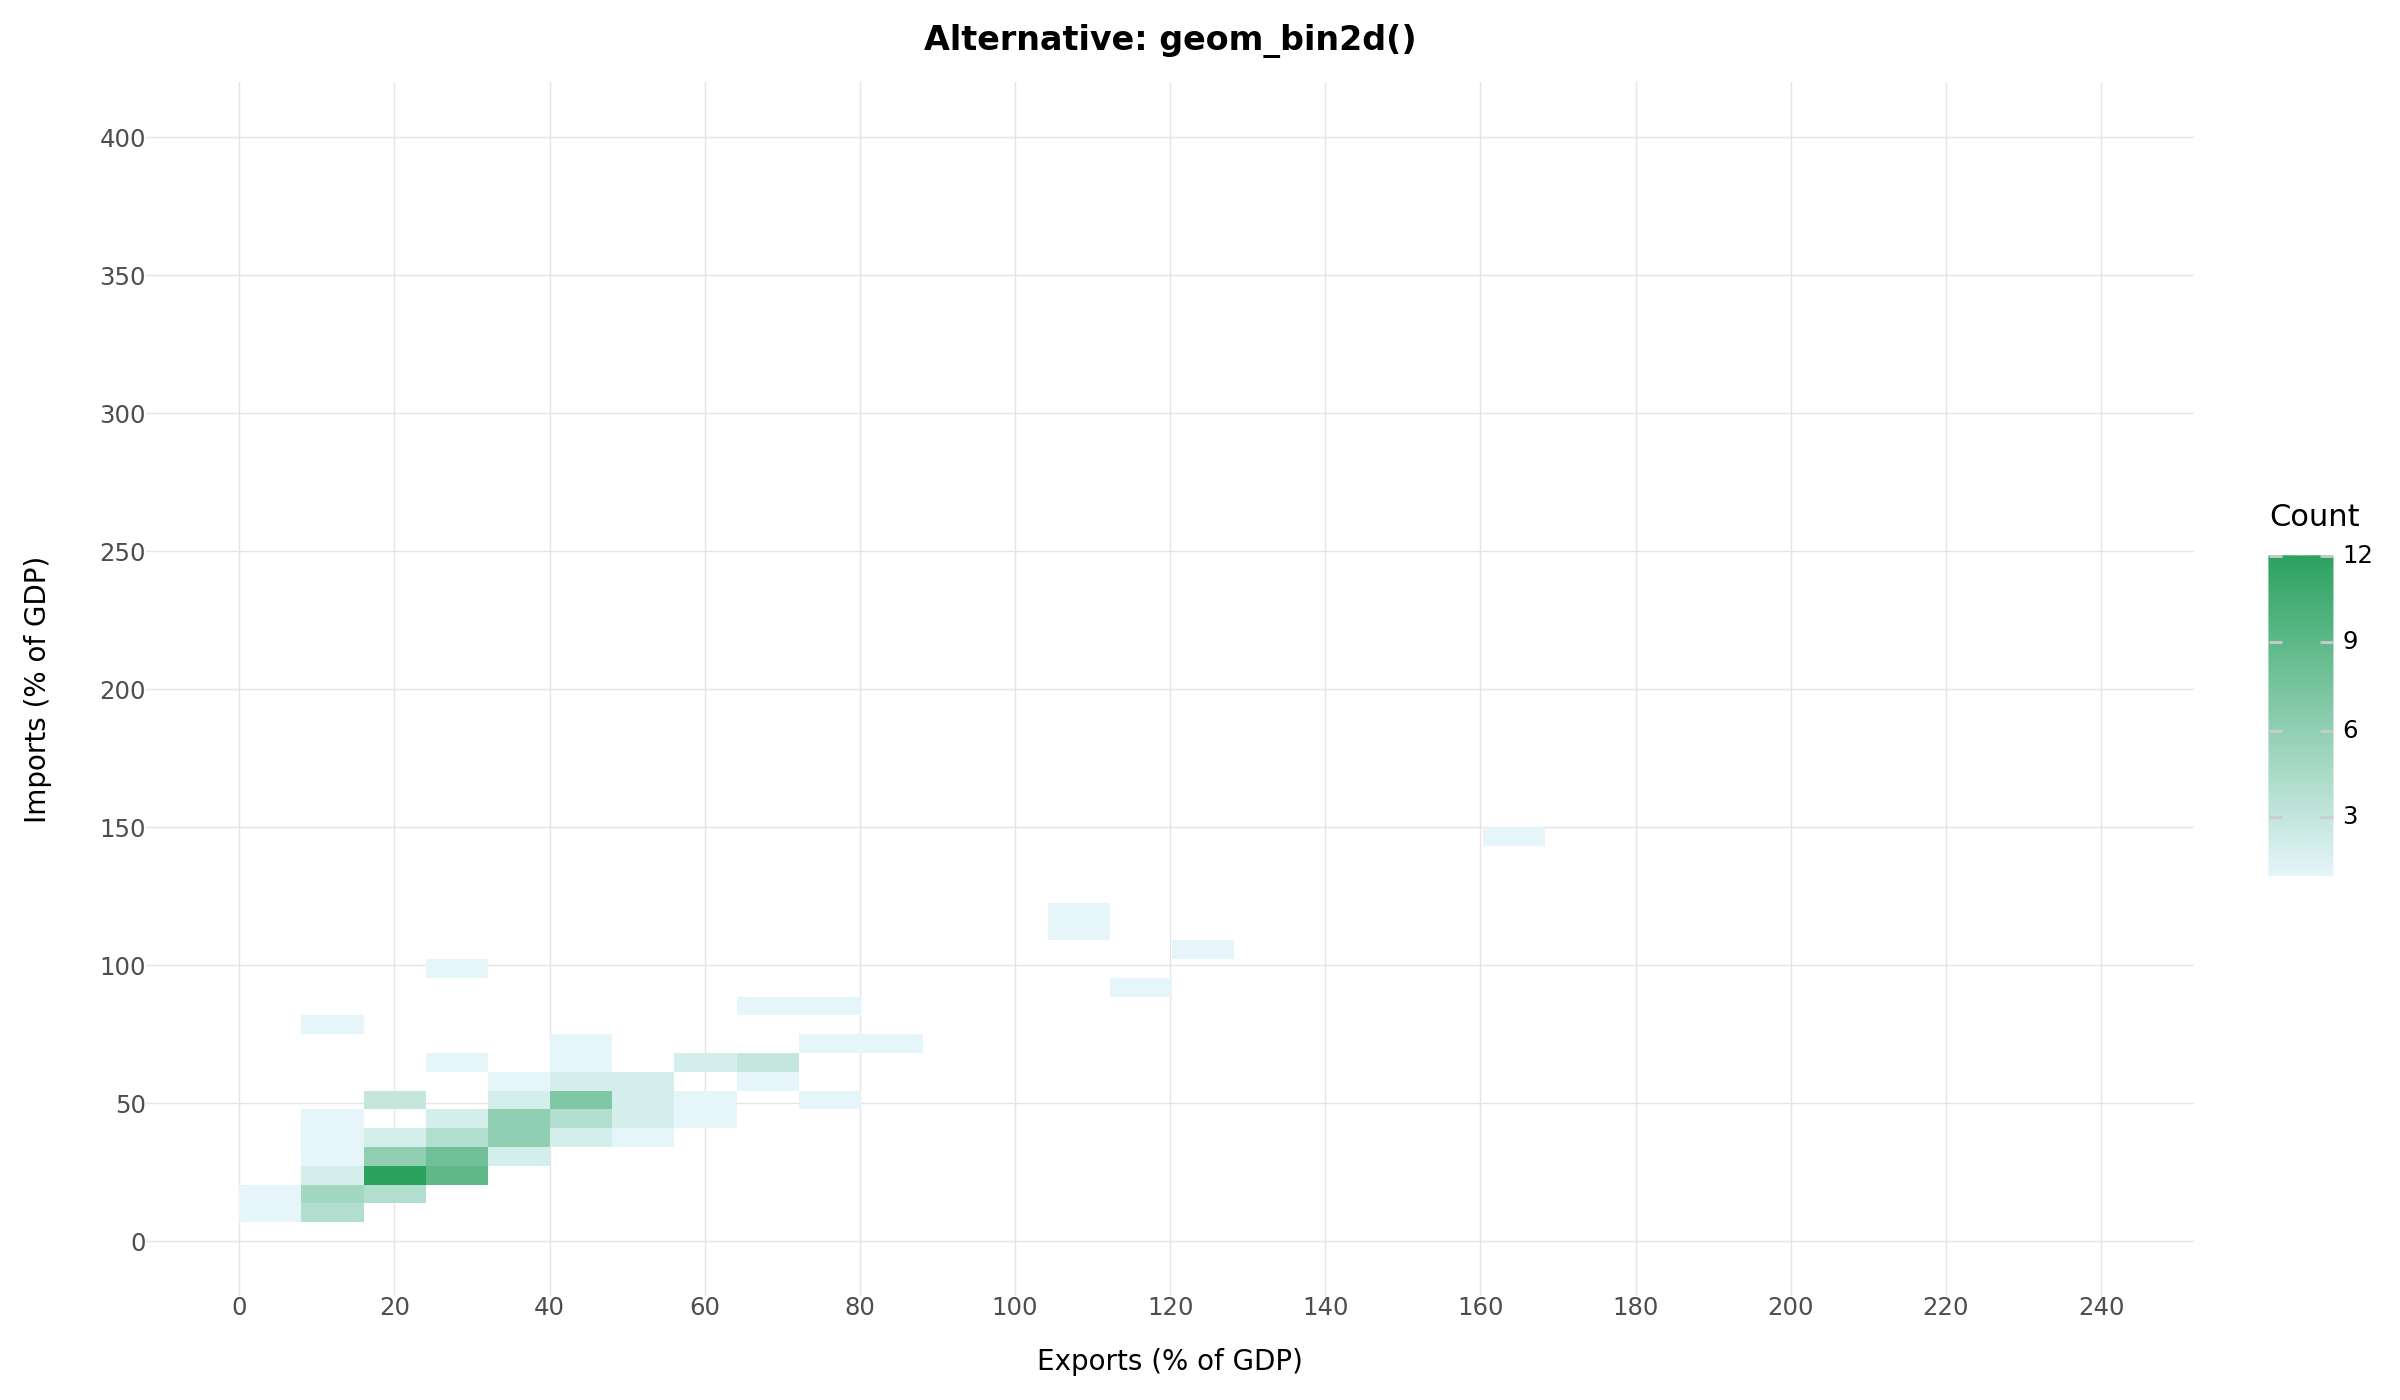

In [84]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_bin2d, scale_x_continuous, labs,
    theme_minimal, theme, coord_cartesian,
    scale_y_continuous, element_text, element_line, element_rect, element_blank,
    annotate, scale_fill_gradient
)

# Function to convert values like '12.4k' to numbers
def convert_k_to_number(value):
    if pd.isna(value):
        return None
    if isinstance(value, str):
        if 'k' in value.lower():
            return float(value.lower().replace('k', '')) * 1000
        return float(value)
    return value

# Apply conversion to energy column
df['energy'] = df['energy'].apply(convert_k_to_number)

# Convert all numeric columns to proper numeric types
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')
df['exports'] = pd.to_numeric(df['exports'], errors='coerce')
df['imports'] = pd.to_numeric(df['imports'], errors='coerce')

# Remove rows with missing values in key columns
df_clean = df.dropna(subset=['exports', 'imports', 'energy'])

(
    ggplot(df_clean)
    + aes(x="exports", y="imports")
    + geom_bin2d(bins=20)  # 2D heatmap showing density
    + scale_x_continuous(breaks=range(0, 241, 20))
    + scale_y_continuous(breaks=range(0, 401, 50))
    + scale_fill_gradient(low="#E5F5F9", high="#2CA25F", name="Count")
    + coord_cartesian(xlim=(0, 240), ylim=(0, 400))
    + labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)",
        title="Alternative: geom_bin2d()"
    )
    + theme_minimal()
    + theme(
        figure_size=(12, 7),
        legend_position="right",
        panel_grid_major=element_line(color="#E5E5E5", size=0.5),
        panel_grid_minor=element_blank(),
        axis_title_x=element_text(size=10, margin={'t': 10}),
        axis_title_y=element_text(size=10, margin={'r': 10}),
        plot_title=element_text(size=12, weight='bold')
    )
)

This heat map also has pro's and cons. The pro's are its very easy to see whre the coutnry data is clumped as it can be hard to tell how many circles there are in one spot when they are all overallped. By doing so, it shows a clear general trend and shows the density. It also simplifies this clustered data into something thats easy to glance at and understand.

The big cons though is it loses lots of details as you can't tell which country nor region they belong to, so its a massive loss in that aspect

# **Task 3**
**1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.**

**2. Import the q3data.csv dataset.**

**3 Recreate the plot as best you can using plotnine.**

**4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.**

1) The aesthetcs being used in this are x, y, color, and size once again, but the variables for each are going to change dramatically

x is going to become internet users, representing the % of the population using the internet

y is going to be gdp, representing gdp per capita

color is STILL the four regions we have been using this whole team

But now size is income

In [57]:
# 2 - Importing the dataset
from google.colab import files
import pandas as pd

# I was having trouble uploading to my ipynb file in COLAB so I searched up and found this function that worked well! Hopefully that is okay to use!
uploaded = files.upload()
df = pd.read_csv("q3data.csv")
df.head()

Saving q3data.csv to q3data.csv


,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


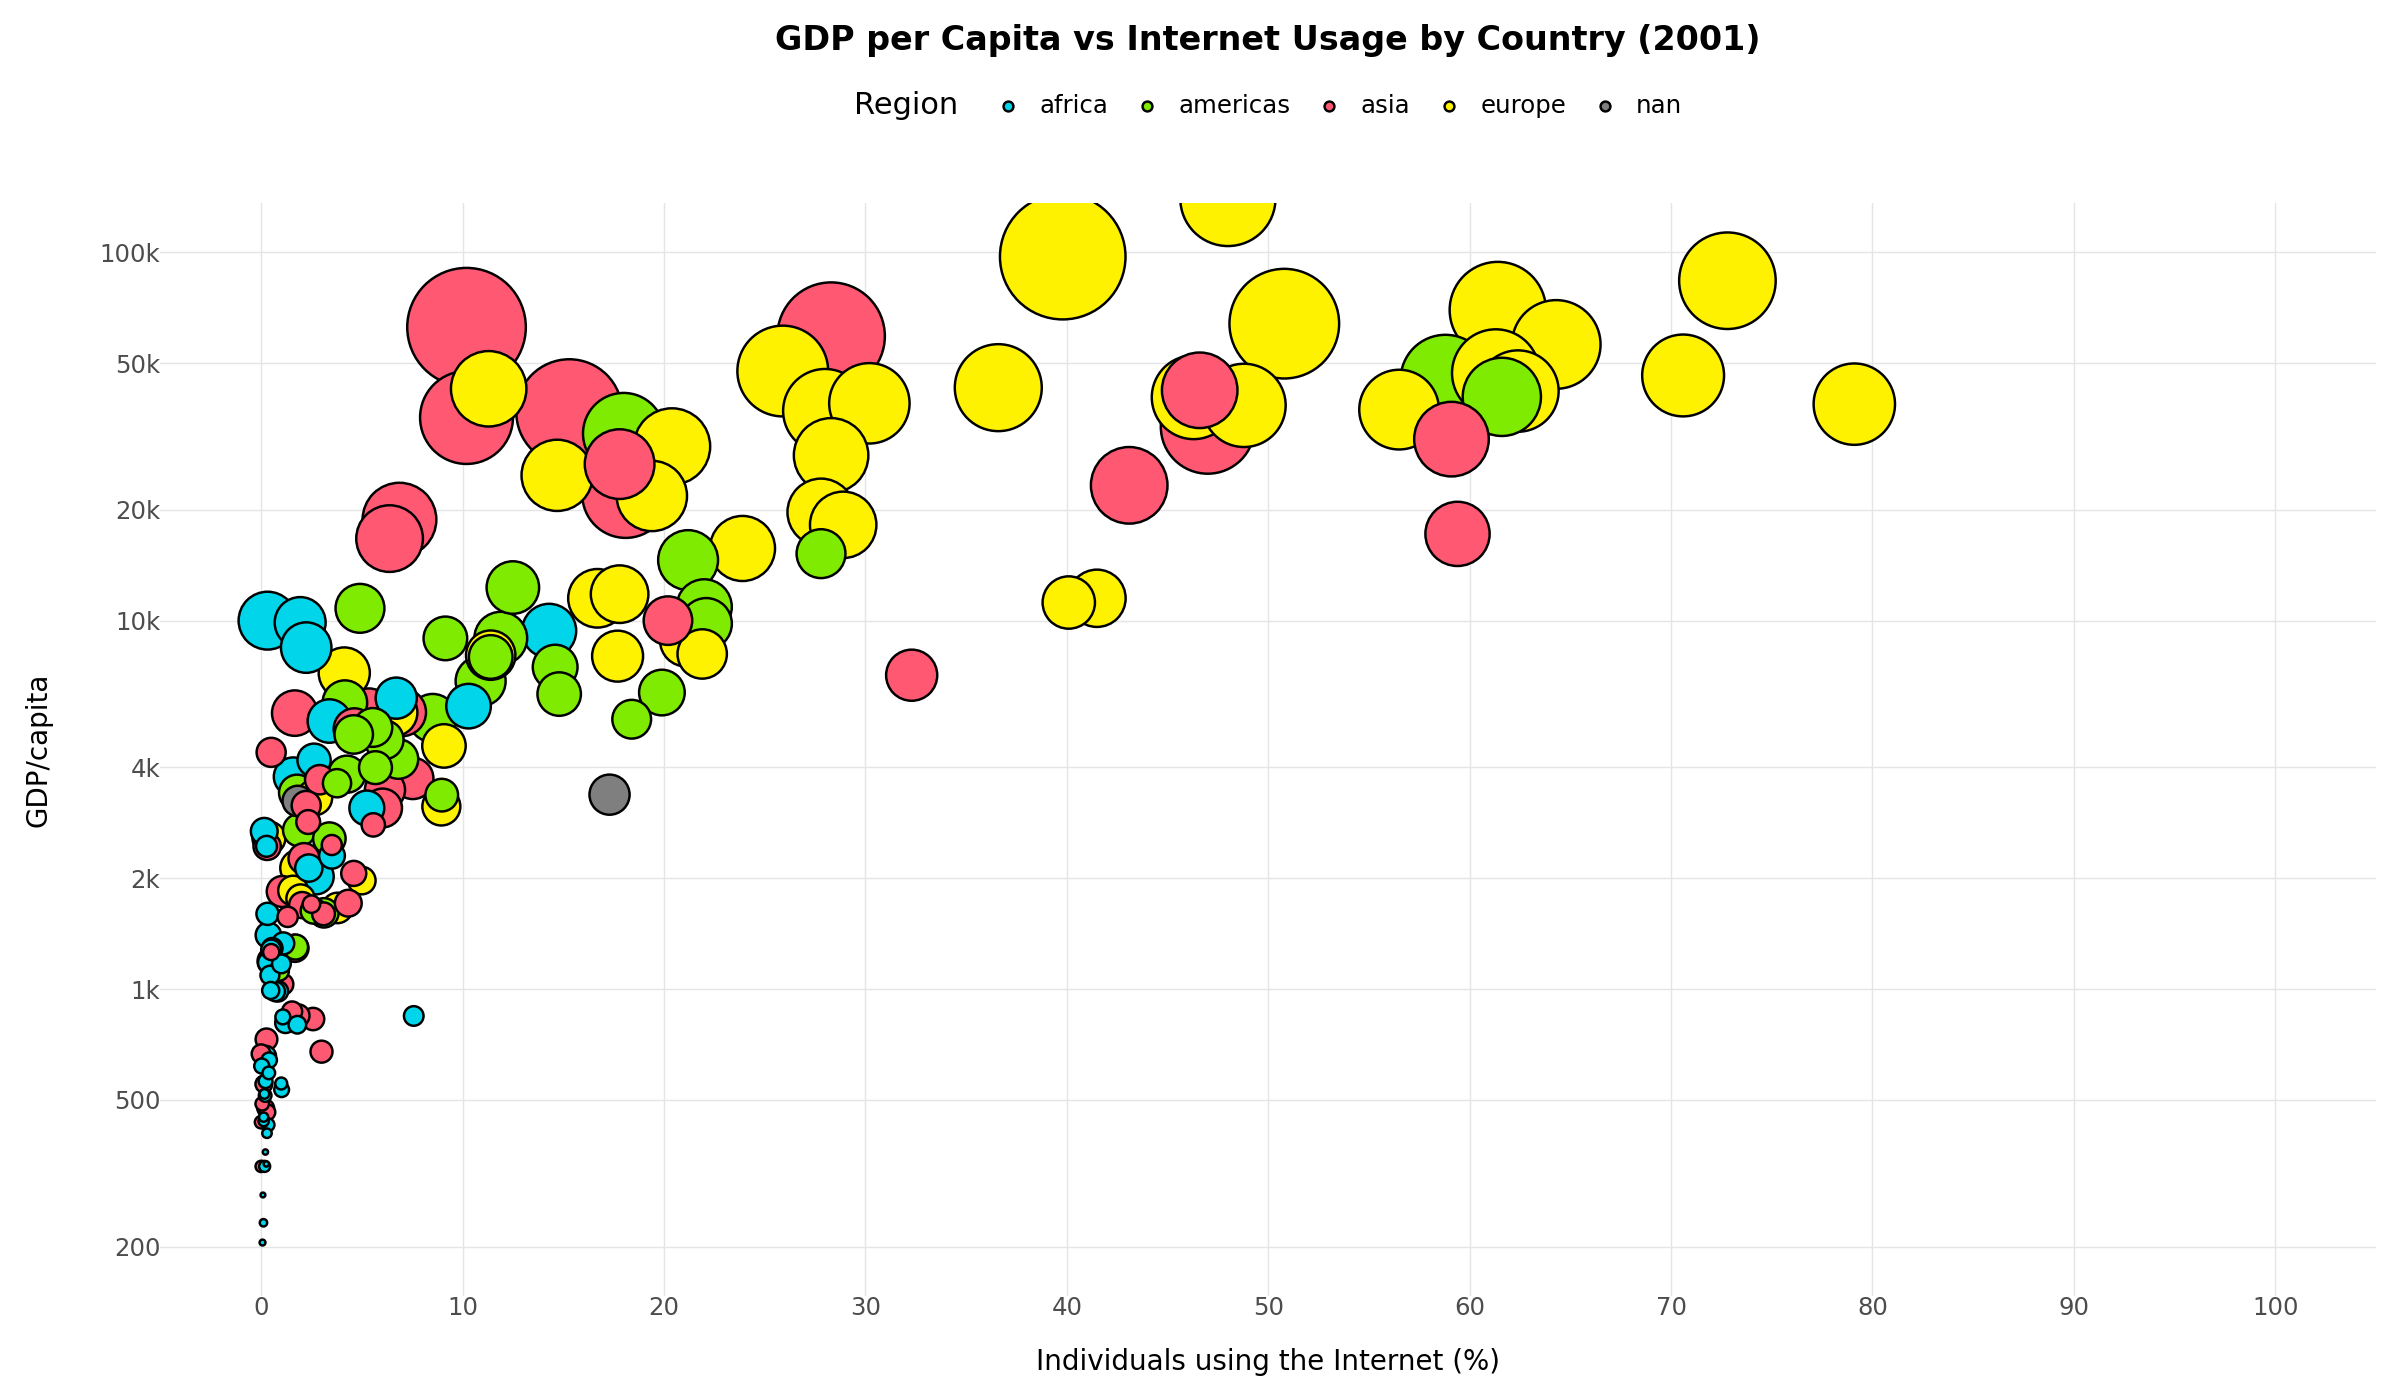

In [66]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, scale_x_continuous, scale_size_area, labs,
    theme_minimal, theme, scale_color_manual, coord_cartesian,
    scale_y_log10, element_text, element_line, element_rect, element_blank,
    guides
)

# Sort by income (size) in descending order so largest bubbles are drawn first (in back)
df_clean = df.sort_values('income', ascending=False)

# colors
region_colors = {
    "asia": "#FF5872",
    "europe": "#FFF200",
    "africa": "#00D5E9",
    "americas": "#7FEB00"
}

(
    ggplot(df_clean)
    + aes(x="internet_users", y="gdp", size="income", fill="four_regions")
    + geom_point(alpha=1.0, color="black", stroke=0.5, shape="o")
    + scale_x_continuous(breaks=range(0, 101, 10))
    + scale_y_log10(
        breaks=[200, 500, 1000, 2000, 4000, 10000, 20000, 50000, 100000],
        labels=["200", "500", "1k", "2k", "4k", "10k", "20k", "50k", "100k"]
    )
    + scale_size_area(max_size=25)  # bubbles are all able to be compared
    + scale_fill_manual(values=region_colors)
    + coord_cartesian(xlim=(0, 100), ylim=(200, 100000))
    + labs(
        x="Individuals using the Internet (%)",
        y="GDP/capita",
        title="GDP per Capita vs Internet Usage by Country (2001)",
        fill="Region"
    )
    + theme_minimal()
    + theme(
        figure_size=(12, 7),
        legend_position="top",
        legend_box="horizontal",
        panel_grid_major=element_line(color="#E5E5E5", size=0.5),
        panel_grid_minor=element_blank(),
        axis_title_x=element_text(size=10, margin={'t': 10}),
        axis_title_y=element_text(size=10, margin={'r': 10, 'l': 5}),
        plot_title=element_text(size=12, weight='bold')
    )
    + guides(size=False)
)

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density_2d : Removed 15 rows containing non-finite values.
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


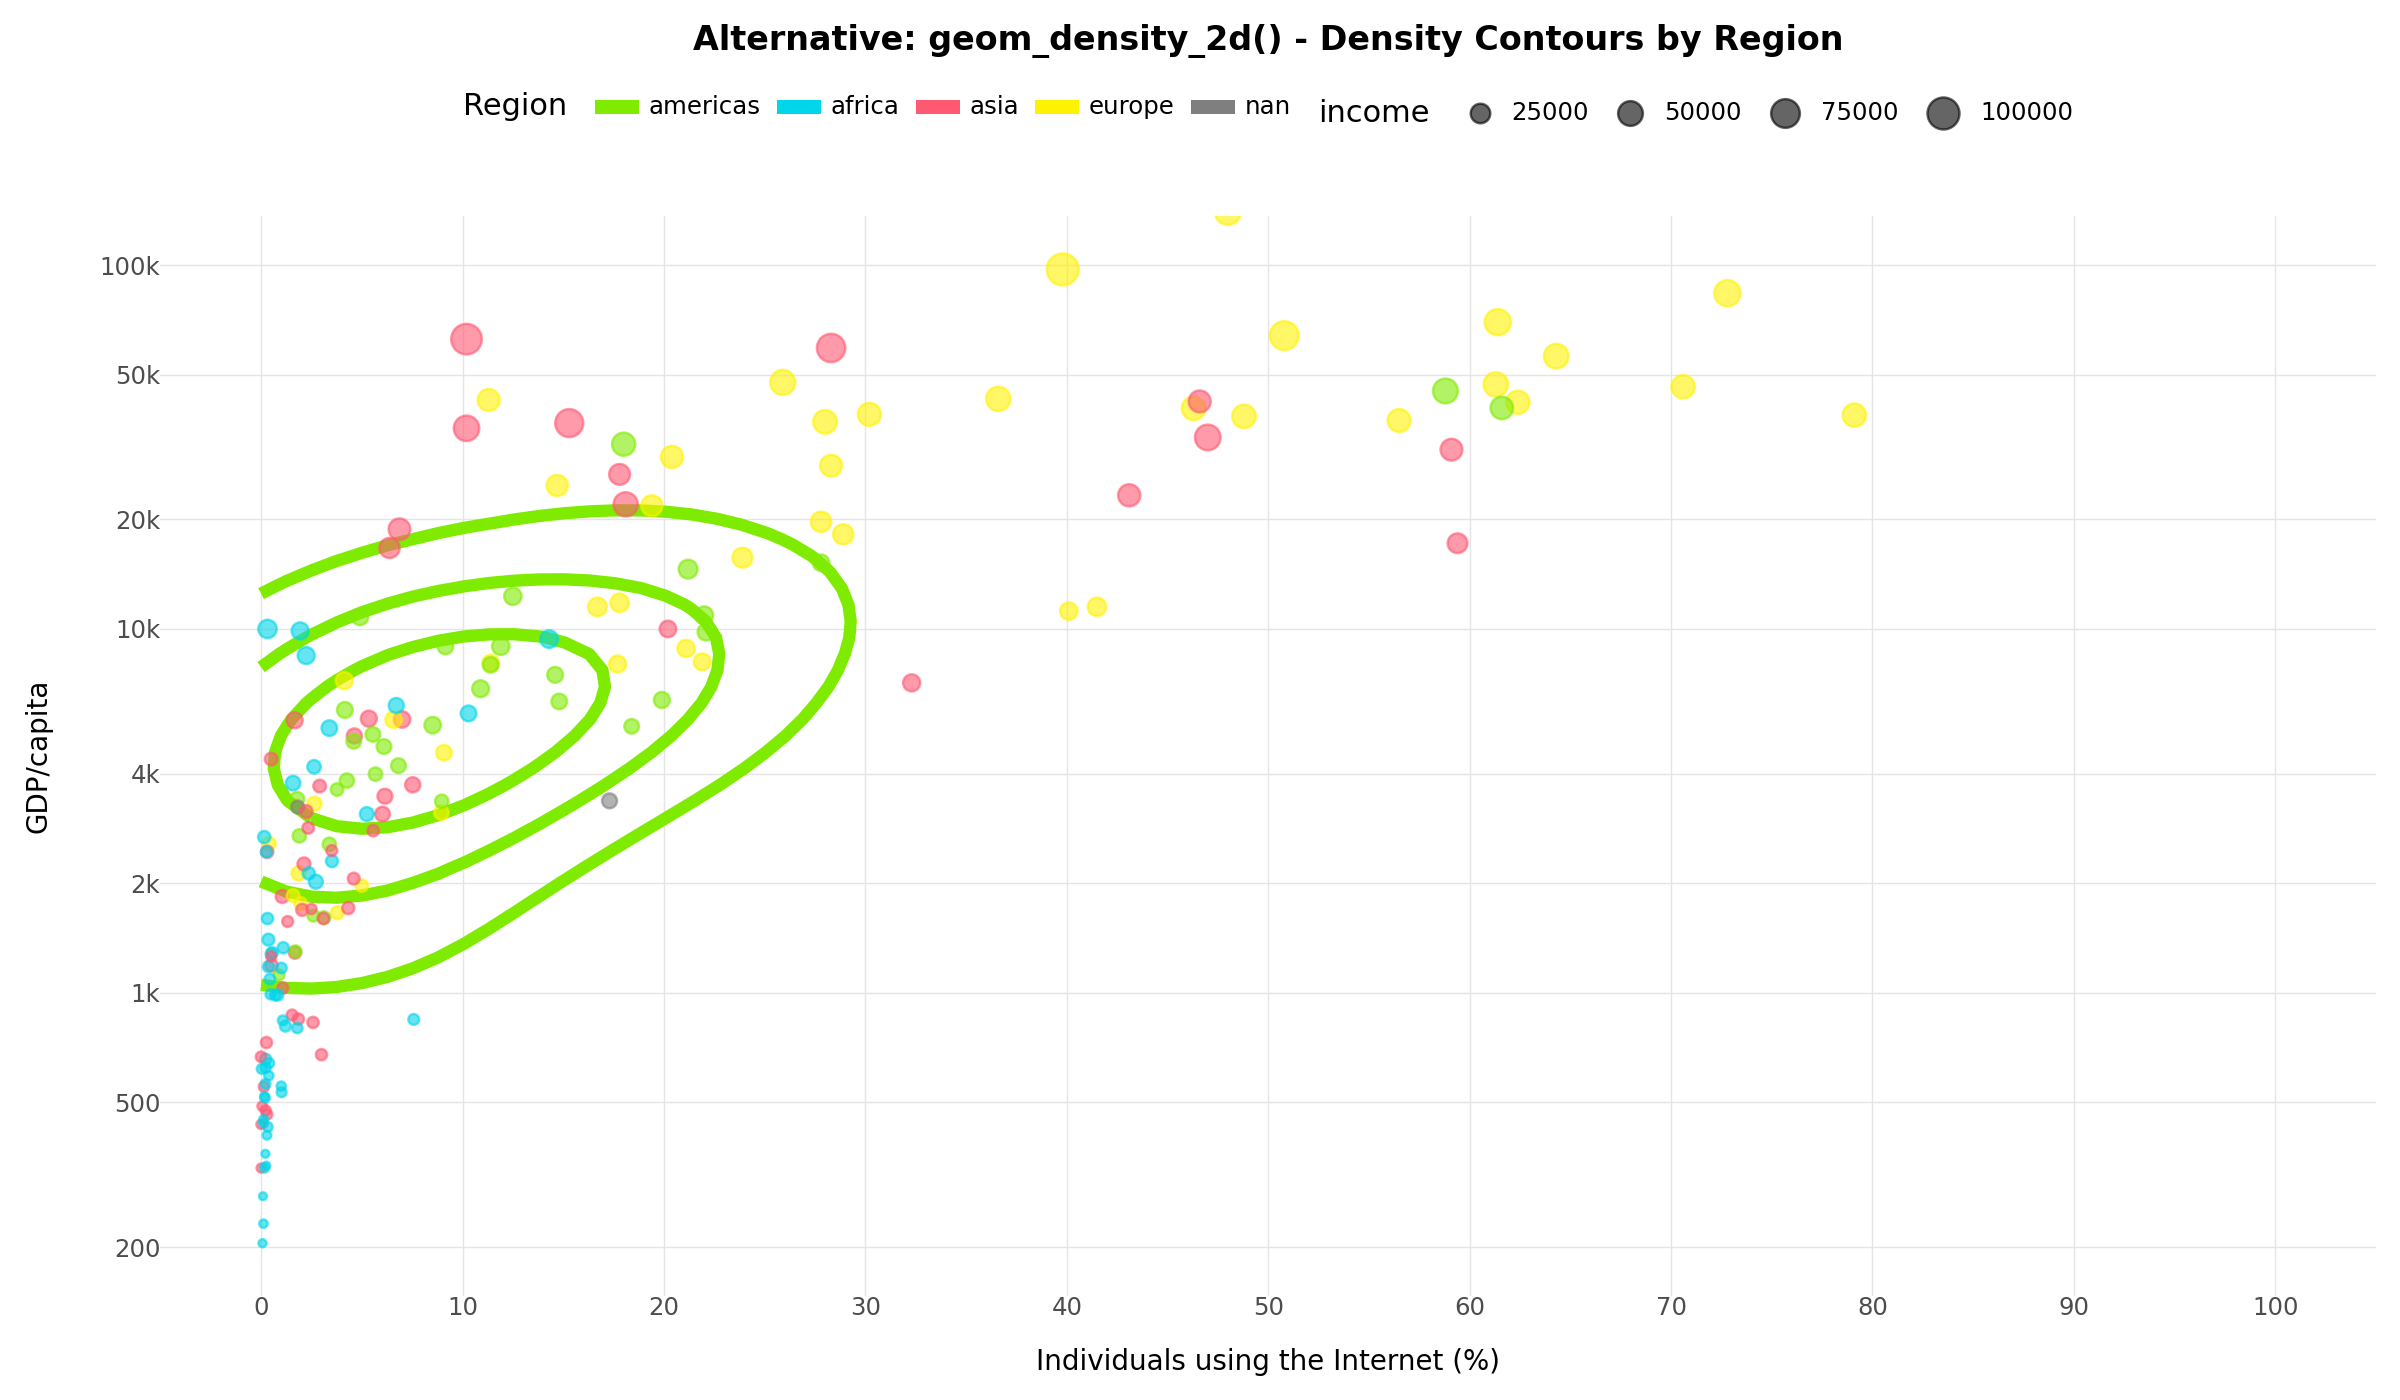

In [69]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_density_2d, geom_point, scale_x_continuous, labs,
    theme_minimal, theme, scale_color_manual, coord_cartesian,
    scale_y_log10, element_text, element_line, element_rect, element_blank
)

# Sort by income (size) in descending order
df_clean = df.sort_values('income', ascending=False)

# USame colors
region_colors = {
    "asia": "#FF5872",
    "europe": "#FFF200",
    "africa": "#00D5E9",
    "americas": "#7FEB00"
}

(
    ggplot(df_clean)
    + aes(x="internet_users", y="gdp", color="four_regions")
    + geom_density_2d(size=2.5, alpha=1)  # Contour lines showing density
    + geom_point(aes(size="income"), alpha=0.6)  # Add faint points for reference
    + scale_x_continuous(breaks=range(0, 101, 10))
    + scale_y_log10(
        breaks=[200, 500, 1000, 2000, 4000, 10000, 20000, 50000, 100000],
        labels=["200", "500", "1k", "2k", "4k", "10k", "20k", "50k", "100k"]
    )
    + scale_color_manual(values=region_colors)
    + coord_cartesian(xlim=(0, 100), ylim=(200, 100000))
    + labs(
        x="Individuals using the Internet (%)",
        y="GDP/capita",
        title="Alternative: geom_density_2d() - Density Contours by Region",
        color="Region"
    )
    + theme_minimal()
    + theme(
        figure_size=(12, 7),
        legend_position="top",
        legend_box="horizontal",
        panel_grid_major=element_line(color="#E5E5E5", size=0.5),
        panel_grid_minor=element_blank(),
        axis_title_x=element_text(size=10, margin={'t': 10}),
        axis_title_y=element_text(size=10, margin={'r': 10, 'l': 5}),
        plot_title=element_text(size=12, weight='bold')
    )
)

This is similar to the last, but provides the pro of giving that general 2D density outline so someone could quickly understand where majority of the data lies. Very helpful in this way, btu the con is it can also distract from the data and is probabily not extremely neccessary overall.